<a href="https://colab.research.google.com/github/teim-projects/Group3_Fouling_Factor_Prediction_in_Heat_Exchanger/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.6 MB/s eta 0:00:00


In [ ]:
#df = pd.read_csv('E:\Sem_7_4th_year\Final_Year_BTech_project\dataset.csv', index_col='Date',parse_dates=True)
df = pd.read_csv('/content/dataset.csv', index_col='Date',parse_dates=True)
df.head()
print(df)

            Crude Temp In  Crude Temp Out  CDU1 rate \n(KBPD)  \
Date                                                            
2012-08-10     154.797468        177.4809             92.3039   
2012-08-11     161.205191        183.0916             91.9925   
2012-08-12     161.716401        182.7077             91.2404   
2012-08-13     161.664472        182.4263             91.1133   
2012-08-14     160.344884        181.3518             94.0905   
...                   ...             ...                 ...   
2012-12-27     147.816959        165.3204            102.7999   
2012-12-28     149.264486        166.9163            101.9233   
2012-12-29     150.276124        169.3887            100.1238   
2012-12-30     150.637563        170.1837            100.7615   
2012-12-31     152.437754        171.2037            101.5724   

            Crude Flow rate (kg/hr)  Kero Temp In  Kero Temp Out  \
Date                                                               
2012-08-10        

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2012-08-10 to 2012-12-31
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Crude Temp In                   144 non-null    float64
 1   Crude Temp Out                  144 non-null    float64
 2   CDU1 rate 
(KBPD)               144 non-null    float64
 3   Crude Flow rate (kg/hr)         144 non-null    float64
 4   Kero Temp In                    144 non-null    float64
 5   Kero Temp Out                   144 non-null    float64
 6   Kero Flow m3/hr                 144 non-null    float64
 7   Furnace inlet temp (deg C)      144 non-null    float64
 8   crudeTemp Increase              144 non-null    float64
 9   Kero Temp decrease              144 non-null    float64
 10  Q (heat exchanged) MW           144 non-null    float64
 11  Hot-in - Cold-out               144 non-null    float64
 12  Hot-out -Cold-in 

In [ ]:
print(df.shape)

(144, 17)


In [ ]:
#Predicting based on whatever we have for comparasion 
X = df.iloc[ : , 0 : -1]  # EXTRACTING X .... All rows and col all excluding last column
y = df.iloc[ : , -1]  #Printing all rows from -1 column i.e., last column
print(X)
#print(df.head(y))
print(y)  #date, fouling resistance 

            Crude Temp In  Crude Temp Out  CDU1 rate \n(KBPD)  \
Date                                                            
2012-08-10     154.797468        177.4809             92.3039   
2012-08-11     161.205191        183.0916             91.9925   
2012-08-12     161.716401        182.7077             91.2404   
2012-08-13     161.664472        182.4263             91.1133   
2012-08-14     160.344884        181.3518             94.0905   
...                   ...             ...                 ...   
2012-12-27     147.816959        165.3204            102.7999   
2012-12-28     149.264486        166.9163            101.9233   
2012-12-29     150.276124        169.3887            100.1238   
2012-12-30     150.637563        170.1837            100.7615   
2012-12-31     152.437754        171.2037            101.5724   

            Crude Flow rate (kg/hr)  Kero Temp In  Kero Temp Out  \
Date                                                               
2012-08-10        

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
#print('X_train is  : \n',X_train) #80% of 144 samples randomly selected ~ 115
print('len of X_train : ',len(X_train))
#print('X_test is : \n',X_test)  #20% of 144 records randomly selected ~ 29
print('len of X_test : ',len(X_test))
print('len of y_train is : ',len(y_train))
print('len of y_test is : ',len(y_test))

X_train

len of X_train :  115
len of X_test :  29
len of y_train is :  115
len of y_test is :  29


,Crude Temp In,Crude Temp Out,CDU1 rate \n(KBPD),Crude Flow rate (kg/hr),Kero Temp In,Kero Temp Out,Kero Flow m3/hr,Furnace inlet temp (deg C),crudeTemp Increase,Kero Temp decrease,Q (heat exchanged) MW,Hot-in - Cold-out,Hot-out -Cold-in,LMTD,U transfer rate,Cummulative Flow Tones per day
Date,,,,,,,,,,,,,,,,
2012-09-14,147.362691,162.4793,100.5173,459746.1383,255.679890,190.0319,129.0549,191.0085,15.116592,65.647965,5.057906,93.200608,42.669235,64.677998,140.346983,3.953259e+05
2012-11-18,164.383140,183.9862,75.8141,346758.3685,288.001617,217.0490,114.9970,211.8951,19.603017,70.952606,4.947077,104.015460,52.665871,75.450645,117.672396,1.101476e+06
2012-11-29,152.366665,169.9402,101.0302,462091.8889,280.673203,217.5514,149.5185,194.4825,17.573561,63.121772,5.909992,110.732978,65.184766,85.956905,123.394280,1.218236e+06
2012-09-19,149.820827,167.5880,101.2223,462970.7453,267.141669,200.8409,143.2615,199.1210,17.767184,66.300785,5.986472,99.553657,51.020057,72.603144,147.980473,4.506930e+05
2012-08-27,153.092540,172.1184,103.0260,471220.3603,273.070243,203.8835,146.0981,200.7871,19.025867,69.186789,6.524801,100.951837,50.790915,73.022303,160.361699,1.960818e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-21,151.147946,170.8152,86.2197,394351.5720,290.525627,225.0679,121.2943,192.7805,19.667206,65.457687,5.644494,119.710474,73.919994,94.982716,106.652086,1.439864e+06
2012-12-25,150.339980,168.9101,87.5921,400628.9257,289.738554,225.7114,121.0413,192.3345,18.570114,64.027159,5.414466,120.828461,75.371416,96.318775,100.886626,1.477509e+06
2012-10-21,156.656459,174.5846,102.2846,467829.4232,282.518392,227.2132,171.6993,197.8263,17.928125,55.305238,6.104094,107.933807,70.556695,87.925133,124.593980,8.046395e+05


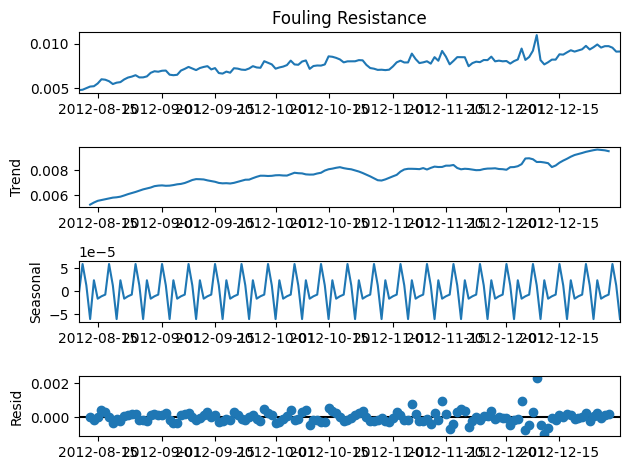

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['Fouling Resistance'])  #decompostition of FR date-wise
results.plot();

In [ ]:
#MinMax scaling
from sklearn.preprocessing import MinMaxScaler

#creating object of MinMax Scaler Class

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#print(X_train_scaled)
#print(X_test_scaled)


In [ ]:
#-------------------------------------------------------------------------------------------------------
#Extra start 
from keras.preprocessing.sequence import TimeseriesGenerator

# define generator
n_input = 3 
n_features = 1
generator = TimeseriesGenerator(X_test_scaled, X_test_scaled, length=n_input, batch_size=1)

X,y = generator[1]
print(X_test_scaled)
print('-----------------------------------------------------------------------------')
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')   #It takes 3 inputs together as one batch from X_test and it predicts the the 4th value

[[0.9731273  0.91447663 0.72693298 0.72693303 0.78883472 0.87488649
  0.77766442 0.85682745 0.65428634 0.22935211 0.66041619 0.57938843
  0.67895201 0.66559834 0.22647715 0.67135793]
 [0.47957908 0.45312472 0.88441668 0.88441601 0.51839079 0.4809002
  0.44708299 0.53027075 0.52373115 0.56617838 0.59972987 0.52849495
  0.47341252 0.51415051 0.30077821 0.65028135]
 [0.8533293  0.57695816 0.79165534 0.79165415 0.18265871 0.23469961
  0.18693169 0.58166489 0.14517192 0.45999872 0.20580464 0.08635606
  0.12623887 0.12801207 0.30049486 0.60418315]
 [0.32796305 0.32960606 0.97127807 0.97127787 0.36166724 0.38392868
  0.48679962 0.32114544 0.52216844 0.47784774 0.63142859 0.42074814
  0.43248701 0.45178234 0.39066953 0.34528332]
 [0.58736526 0.59170986 0.86429805 0.86429952 0.50064501 0.57379315
  0.60608751 0.60722971 0.63232523 0.33195516 0.69727121 0.43328976
  0.52462558 0.5173798  0.38478911 0.38103768]
 [0.38147863 0.39373875 0.89720938 0.89720827 0.23650661 0.0956938
  0.35336642 0.3763

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#ANN model
model = Sequential() #model is Sequential class ka object
model.add(Dense(16, activation = 'relu', input_dim=16)) #16 layers 
model.add(Dense(1, activation = 'linear')) #Output layer = 1 

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer = 'Adam')

In [ ]:
last_train_batch = X_train_scaled[-1:]
print(last_train_batch)

[[0.33440916 0.43347963 0.89506567 0.89506709 0.44554204 0.45585664
  0.64919757 0.50810036 0.73100629 0.48188153 0.80665937 0.45786311
  0.49683551 0.50711253 0.49328634 0.26537996]]


In [ ]:
print(X_test_scaled[0])

[0.9731273  0.91447663 0.72693298 0.72693303 0.78883472 0.87488649
 0.77766442 0.85682745 0.65428634 0.22935211 0.66041619 0.57938843
 0.67895201 0.66559834 0.22647715 0.67135793]


In [ ]:
#test_predictions = []

#first_eval_batch = X_train_scaled[-n_input:]
#current_batch = first_eval_batch.reshape((1, n_input, n_features))
#current_batch = first_eval_batch.reshape((1, n_input))
#current_batch = first_eval_batch

#for i in range(len(X_test_scaled)):
    
    # get the prediction value for the first batch
    #current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    #test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    #current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    #current_batch = np.append(current_batch[:,1:,:],[current_pred],axis=1)
#------------------------------------------------------------------------------------------------------------- 
#Extra end 

In [ ]:
#Building neural network architecture, for that importing all the libraries 

import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

#print(keras.__version__)

In [ ]:
#ANN model
model = Sequential() #model is Sequential class ka object
model.add(Dense(16, activation = 'relu', input_dim=16)) #16 layers 
model.add(Dense(1, activation = 'linear')) #Output layer = 1 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer = 'Adam')


In [ ]:
history = model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2) #model is trained here
#history.history['accuracy']
%load_ext autotime

Epoch 1/50
3/3 [==============================] - 2s 121ms/step - loss: 0.1944 - val_loss: 0.1524
Epoch 2/50
3/3 [==============================] - 0s 19ms/step - loss: 0.1358 - val_loss: 0.1043
Epoch 3/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0916 - val_loss: 0.0668
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0566 - val_loss: 0.0390
Epoch 5/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0320 - val_loss: 0.0205
Epoch 6/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0159 - val_loss: 0.0098
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0070 - val_loss: 0.0047
Epoch 8/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 9/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 10/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0059 - val_loss: 0.0056
Epoch 11/50
3/3 [===========

In [ ]:
y_pred = model.predict(X_test_scaled)
#y_pred = model.predict(X_scaled)
#X
print(y_pred)
#len(y_pred)
len(y_test)
%load_ext autotime

1/1 [==============================] - 0s 87ms/step
[[ 0.08639004]
 [-0.00205863]
 [ 0.04489187]
 [ 0.02479362]
 [ 0.02982076]
 [ 0.01978647]
 [ 0.01429587]
 [ 0.04768635]
 [-0.02285204]
 [-0.09435237]
 [ 0.0438131 ]
 [ 0.05104294]
 [ 0.00146585]
 [-0.01597161]
 [ 0.02856704]
 [ 0.06990489]
 [ 0.03499686]
 [ 0.07323378]
 [ 0.07306447]
 [ 0.05818196]
 [-0.0262433 ]
 [ 0.0317468 ]
 [-0.0774116 ]
 [ 0.03681277]
 [-0.0103035 ]
 [-0.10615719]
 [-0.05433816]
 [-0.02400852]
 [ 0.04459234]]
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 154 ms (started: 2023-05-24 07:08:13 +00:00)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

print('Mean absolute error is : ')
print(mean_absolute_error(y_test, y_pred))

print(r2_score(y_test,y_pred))

print(mean_squared_error(y_test,y_pred))

#accuracy_score(y_test, y_pred)

rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)

Mean absolute error is : 
0.04137083305396698
-3910.7891626106443
0.0024525663382439704
0.049523391828952615
time: 15.2 ms (started: 2023-05-24 07:08:33 +00:00)


In [ ]:
print(y_test)

Date
2012-11-12    0.008498
2012-11-09    0.007914
2012-11-02    0.007917
2012-09-27    0.007307
2012-10-02    0.007344
2012-08-15    0.005554
2012-09-21    0.007213
2012-09-12    0.007401
2012-11-30    0.008032
2012-11-26    0.008164
2012-08-24    0.006322
2012-08-26    0.006232
2012-10-23    0.008163
2012-12-16    0.008778
2012-10-18    0.008240
2012-09-08    0.007405
2012-10-07    0.007642
2012-12-26    0.009566
2012-09-10    0.007049
2012-10-14    0.007679
2012-09-24    0.007225
2012-08-29    0.006744
2012-10-26    0.007280
2012-11-01    0.007457
2012-12-07    0.008512
2012-11-08    0.007834
2012-12-11    0.007685
2012-09-23    0.007069
2012-09-07    0.007186
Name: Fouling Resistance, dtype: float64
time: 2.43 ms (started: 2023-05-24 07:08:47 +00:00)


In [ ]:
df1 = pd.DataFrame(y_test)
df2 = pd.DataFrame(y_pred)


print('y_test values : ',df1)
print('y_pred values : ',df2)

y_test values :              Fouling Resistance
Date                          
2012-11-12            0.008498
2012-11-09            0.007914
2012-11-02            0.007917
2012-09-27            0.007307
2012-10-02            0.007344
2012-08-15            0.005554
2012-09-21            0.007213
2012-09-12            0.007401
2012-11-30            0.008032
2012-11-26            0.008164
2012-08-24            0.006322
2012-08-26            0.006232
2012-10-23            0.008163
2012-12-16            0.008778
2012-10-18            0.008240
2012-09-08            0.007405
2012-10-07            0.007642
2012-12-26            0.009566
2012-09-10            0.007049
2012-10-14            0.007679
2012-09-24            0.007225
2012-08-29            0.006744
2012-10-26            0.007280
2012-11-01            0.007457
2012-12-07            0.008512
2012-11-08            0.007834
2012-12-11            0.007685
2012-09-23            0.007069
2012-09-07            0.007186
y_pred values :       

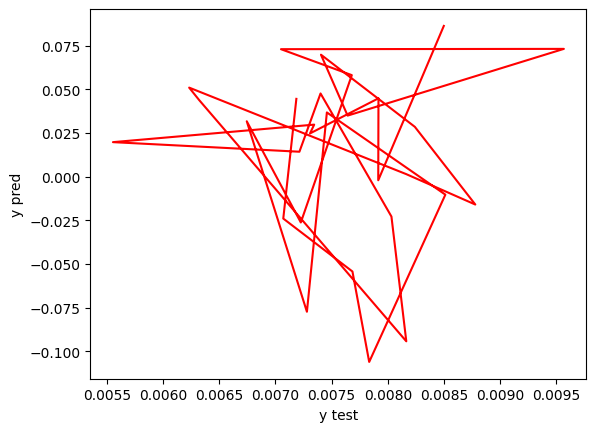

time: 505 ms (started: 2023-05-24 07:09:13 +00:00)


In [ ]:
import matplotlib.pyplot as plt
#plt.plot(y_test,y_pred)
#plt.show()


ax=plt.subplot()
ax.set_xlabel("y test")
ax.set_ylabel("y pred")
plt.plot(y_test,y_pred,color = 'red')
plt.show()



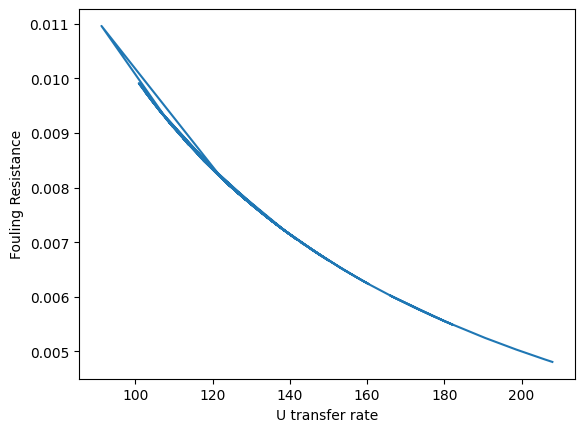

time: 232 ms (started: 2023-05-24 07:09:29 +00:00)


In [ ]:
ax=plt.subplot()
ax.set_xlabel("U transfer rate")
ax.set_ylabel("Fouling Resistance")
plt.plot(df['U transfer rate'],df['Fouling Resistance'])
plt.show()

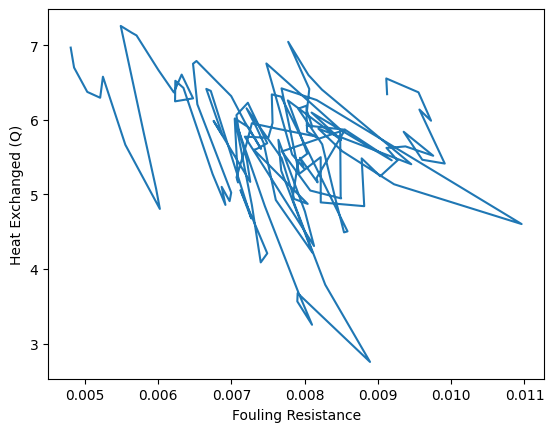

time: 248 ms (started: 2023-05-24 07:09:41 +00:00)


In [ ]:
ax=plt.subplot()
ax.set_xlabel("Fouling Resistance")
ax.set_ylabel("Heat Exchanged (Q)")
plt.plot(df['Fouling Resistance'],df['Q (heat exchanged) MW'])
plt.show()